Proyecto 2-Parte I (Core)

Proyecto 2: Análisis Inicial y Selección de Problema

Objetivo: Realizar un análisis exploratorio de datos (EDA) inicial para al menos cuatro conjuntos de datos, diagnosticar y elegir una problemática específica para abordar (regresión, clasificación, clusterización, predicción). Entregar un repositorio con el dataset elegido, el EDA inicial y la problemática seleccionada.

Parte I: Búsqueda y Análisis de Conjuntos de Datos

# 1) Búsqueda de Conjuntos de Datos:
* Buscar al menos cuatro conjuntos de datos en plataformas como Kaggle, UCI Machine Learning Repository o cualquier otra fuente confiable.
* Asegurarse de que los conjuntos de datos seleccionados sean diversos y cubran diferentes dominios y tipos de datos.

# 2) Análisis Exploratorio de Datos (EDA) Inicial:
* Realizar un EDA inicial para cada uno de los cuatro conjuntos de datos seleccionados.
* Incluir visualizaciones, análisis estadístico descriptivo, identificación de valores nulos y outliers.
* Documentar los hallazgos de cada EDA en un notebook de Jupyter.

## 2.1) Descripción del Conjunto de Datos:Descripción del Conjunto de Datos:
Breve descripción de cada conjunto de datos, incluyendo la fuente, el tamaño y las variables.

Acerca del conjunto de datos

El conjunto de datos Student Performance-BD contiene información sobre el rendimiento académico de los estudiantes de varias regiones de Bangladesh. Incluye 24 atributos relacionados con la demografía, las métricas académicas, las actividades extracurriculares y otros factores relevantes. Los datos se pueden utilizar para analizar el rendimiento de los estudiantes, explorar los factores que afectan los resultados académicos y brindar información para ayudar a los estudiantes a elegir los caminos educativos adecuados.

Columnas:
* id
* full_name
* age
* gender
* location
* family_size
* mother_education
* father_education
* mother_job
* father_job
* guardian
* parental_involvement
* internet_access
* studytime
* tutoring
* school_type
* attendance

Fuente: https://www.kaggle.com/datasets/satayjit/student-performance-bd

## 2.2) Análisis Estadístico Descriptivo:
* Calcular estadísticas descriptivas básicas (media, mediana, desviación estándar, etc.) para las variables numéricas.
* Analizar la distribución de las variables categóricas.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [47]:
# cargar el dataset automobile data
data = pd.read_csv('../datasets/bd_students_per.csv')
print(data.shape)
data.info()
data.head(5)

(8612, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8612 entries, 0 to 8611
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           8612 non-null   int64 
 1   full_name                    8612 non-null   object
 2   age                          8612 non-null   int64 
 3   gender                       8612 non-null   object
 4   location                     8611 non-null   object
 5   family_size                  8612 non-null   int64 
 6   mother_education             8602 non-null   object
 7   father_education             8608 non-null   object
 8   mother_job                   8612 non-null   object
 9   father_job                   8612 non-null   object
 10  guardian                     8612 non-null   object
 11  parental_involvement         8612 non-null   object
 12  internet_access              8612 non-null   object
 13  studytime             

,id,full_name,age,gender,location,family_size,mother_education,father_education,mother_job,father_job,...,tutoring,school_type,attendance,extra_curricular_activities,english,math,science,social_science,art_culture,stu_group
0,2,Avi Biswas,16,Male,Urban,6,SSC,HSC,No,No,...,Yes,Private,95,Yes,95,98,92,94,98,Science
1,3,Taslima Sultana,18,Female,Rural,6,SSC,HSC,No,Yes,...,No,Semi_Govt,92,No,65,71,40,78,80,Commerce
2,4,Md Adilur Rahman,15,Male,Rural,4,SSC,SSC,Yes,Yes,...,Yes,Govt,81,Yes,64,78,58,86,74,Commerce
3,5,Saleh Ahmed,16,Male,Rural,6,SSC,SSC,Yes,Yes,...,Yes,Private,90,Yes,84,90,85,86,88,Science
4,6,Din Islam,17,Male,Urban,5,Honors,Masters,No,Yes,...,Yes,Semi_Govt,75,Yes,54,70,45,79,76,Commerce


In [48]:
data = data.drop(columns=['id', 'full_name'])

In [49]:
data.describe()

,age,family_size,studytime,attendance,english,math,science,social_science,art_culture
count,8612.000000,8612.000000,8612.000000,8612.000000,8612.000000,8612.000000,8612.000000,8612.000000,8612.000000
mean,16.614375,4.502206,4.746168,74.027055,73.610427,72.938110,73.524036,74.465513,76.236066
std,0.969057,1.656726,2.185645,13.290046,15.343903,15.816147,15.115104,14.945846,13.619125
min,10.000000,0.000000,1.000000,30.000000,18.000000,33.000000,33.000000,36.000000,36.000000
25%,16.000000,3.000000,3.000000,63.000000,64.000000,64.000000,63.000000,65.000000,69.000000
50%,17.000000,5.000000,5.000000,73.000000,75.000000,73.000000,75.000000,77.000000,76.000000
75%,17.000000,6.000000,6.000000,86.000000,85.000000,84.000000,85.000000,86.000000,86.000000
max,24.000000,11.000000,16.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


## 2.3) Visualizaciones:
* Crear visualizaciones para entender la distribución de las variables (histogramas, gráficos de barras, box plots, etc.).
* Visualizar las correlaciones entre variables (mapa de calor de correlación).

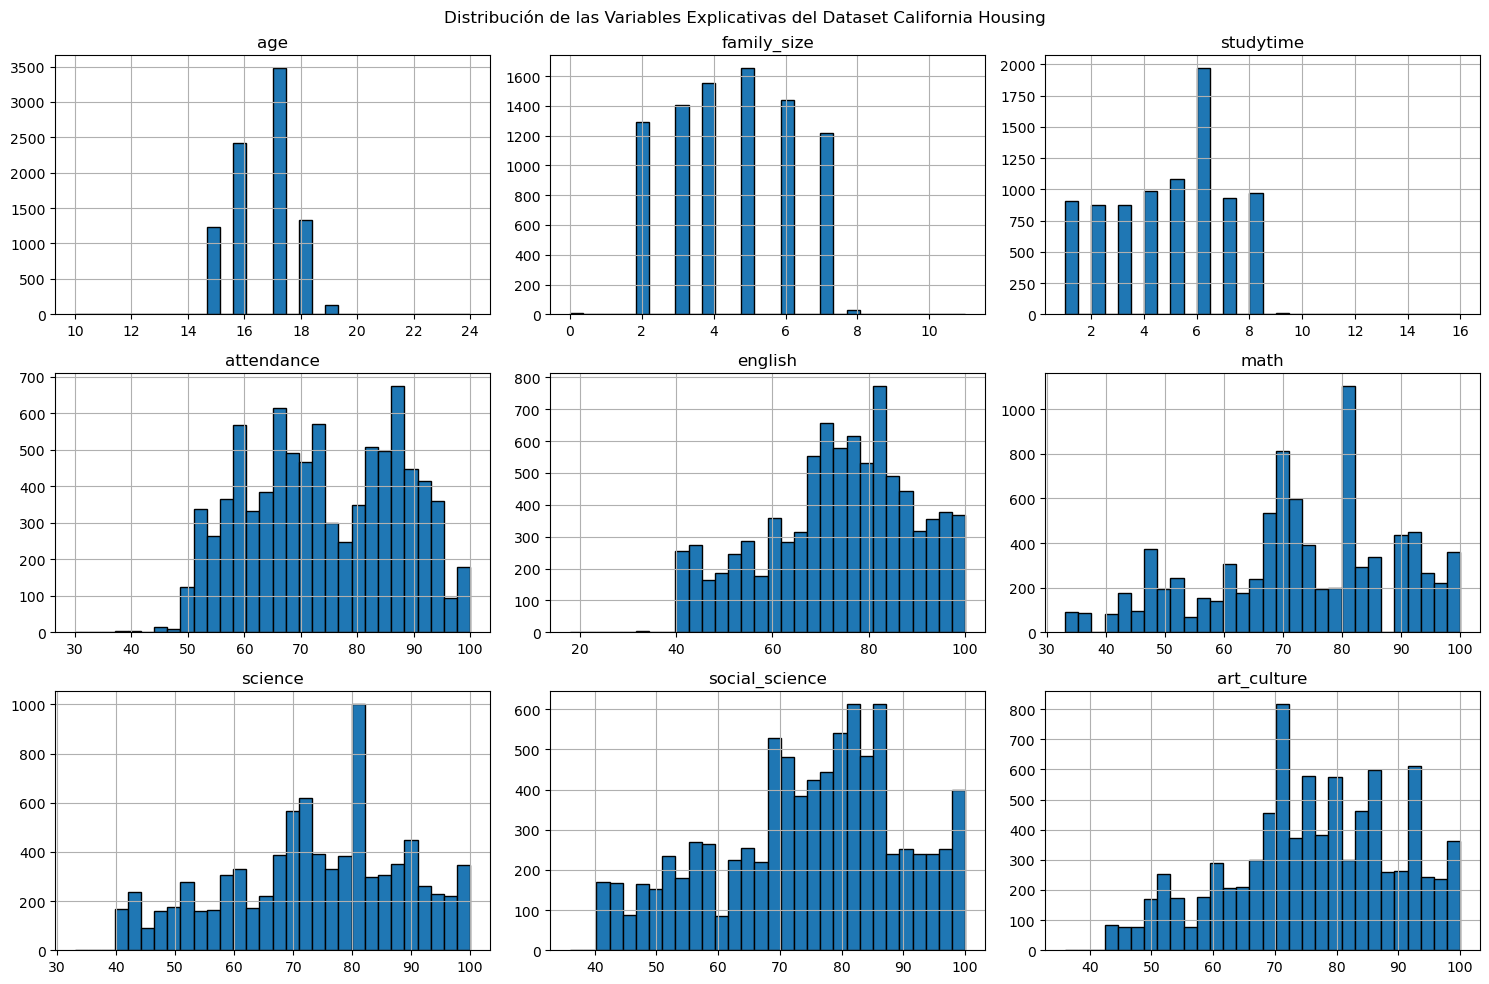

In [50]:
# Crear histogramas para cada característica
data.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribución de las Variables Explicativas del Dataset California Housing')
plt.tight_layout()
plt.show()

In [51]:
data['stu_group'].unique()

array(['Science', 'Commerce', 'Arts', 'science', 'commerce', 'arts'],
      dtype=object)

In [52]:
data['stu_group'] = data['stu_group'].str.lower()
data['stu_group'].unique()

array(['science', 'commerce', 'arts'], dtype=object)

In [53]:
categorical_columns = ['location', 'mother_education', 'father_education',
                       'gender', 'tutoring', 'school_type', 'extra_curricular_activities']

data = pd.DataFrame(data)

# Convertir columnas categóricas a dummies
df_dummies = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
df_dummies

# Crear el codificador
le = LabelEncoder()

# Aplicar Label Encoding al target
data['stu_group_encoded'] = le.fit_transform(data['stu_group'])

# Mostrar el mapeo de categorías originales a números
print(dict(zip(le.classes_, le.transform(le.classes_))))

# Ver el resultado
print(data[['stu_group', 'stu_group_encoded']].drop_duplicates())


{'arts': 0, 'commerce': 1, 'science': 2}
   stu_group  stu_group_encoded
0    science                  2
1   commerce                  1
10      arts                  0


## 2.4) Identificación de Valores Nulos y Outliers:
Detectar valores nulos y discutir cómo podrían ser tratados.
Identificar outliers y evaluar su impacto potencial en el análisis.

In [55]:
print("Duplicados:", data.duplicated().sum())
print("Nulos: ", data.isnull().sum())


Duplicados: 315
Nulos:  age                             0
gender                          0
location                        1
family_size                     0
mother_education               10
father_education                4
mother_job                      0
father_job                      0
guardian                        0
parental_involvement            0
internet_access                 0
studytime                       0
tutoring                        0
school_type                     0
attendance                      0
extra_curricular_activities     0
english                         0
math                            0
science                         0
social_science                  0
art_culture                     0
stu_group                       0
stu_group_encoded               0
dtype: int64


In [56]:
data = data.dropna()
data.isnull().sum()

age                            0
gender                         0
location                       0
family_size                    0
mother_education               0
father_education               0
mother_job                     0
father_job                     0
guardian                       0
parental_involvement           0
internet_access                0
studytime                      0
tutoring                       0
school_type                    0
attendance                     0
extra_curricular_activities    0
english                        0
math                           0
science                        0
social_science                 0
art_culture                    0
stu_group                      0
stu_group_encoded              0
dtype: int64

In [57]:
def convert_object_to_category(data):
    for col in data.select_dtypes(include=['object']).columns:
        data[col] = data[col].astype('category')
    return data

# Usando la función en tu dataset
data = convert_object_to_category(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8599 entries, 0 to 8611
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   age                          8599 non-null   int64   
 1   gender                       8599 non-null   category
 2   location                     8599 non-null   category
 3   family_size                  8599 non-null   int64   
 4   mother_education             8599 non-null   category
 5   father_education             8599 non-null   category
 6   mother_job                   8599 non-null   category
 7   father_job                   8599 non-null   category
 8   guardian                     8599 non-null   category
 9   parental_involvement         8599 non-null   category
 10  internet_access              8599 non-null   category
 11  studytime                    8599 non-null   int64   
 12  tutoring                     8599 non-null   category
 13  school_t

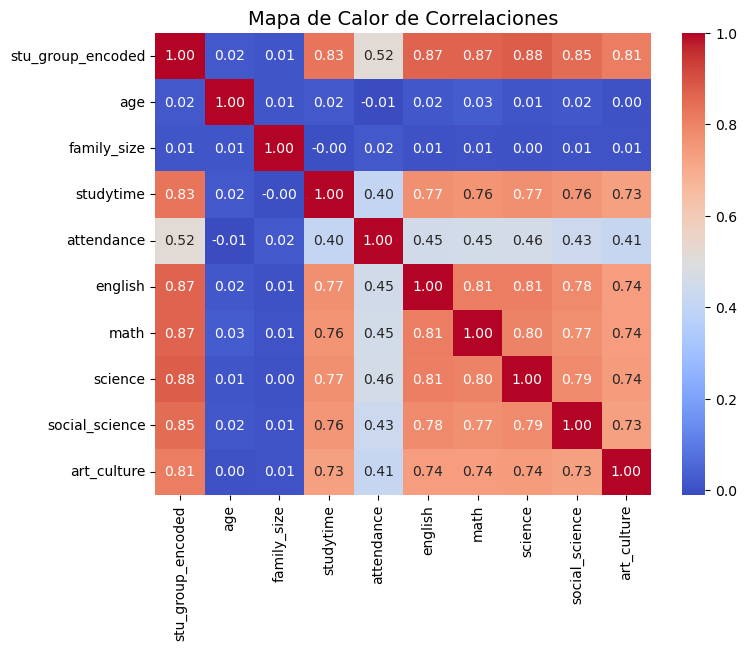

In [59]:
numeric_columns = ['stu_group_encoded', 'age', 'family_size', 'studytime', 'attendance', 'english', 'math', 'science', 'social_science', 'art_culture']

# Calcular la matriz de correlación
correlation_matrix = data[numeric_columns].corr()

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Mapa de Calor de Correlaciones', fontsize=14)
plt.show()

## 2.5) Resumen de Hallazgos:
* Este dataset sobre performance de estudiantes se basa en una clasificacion ya que se busca determinar a cual de las 3 categorias de grupo de estudio van a pertencer
* Los puntajes en cierta materias son los que  probablemente ayuden mas a determinar esta clasificacion